Creating machines : k=100, n=10, l=10
Using hebbian update rule.
Synchronization = 100%   /  Updates = 777 / Eve's updates = 134
Machines have been synchronized.
Time taken = 9.28968095779419 seconds.
Updates = 777.
Eve's machine is only 0 % synced with Alice's and Bob's and she did 134 updates.


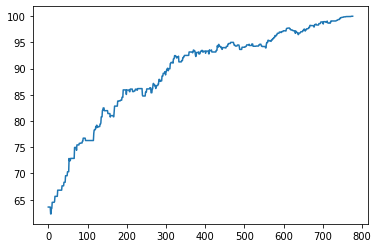

In [4]:
from machine import Machine
import numpy as np
import time
import sys

#Machine parameters
k = 100
n = 10
l = 10

#Update rule
update_rules = ['hebbian', 'anti_hebbian', 'random_walk']
update_rule = update_rules[0]

#Create 3 machines : Alice, Bob and Eve. Eve will try to intercept the communication between
#Alice and Bob.
print("Creating machines : k=" + str(k) + ", n=" + str(n) + ", l=" + str(n))
print("Using " + update_rule + " update rule.")
Alice = Machine(k, n, l)
Bob = Machine(k, n, l)
Eve = Machine(k, n, l)

#Random number generator
def random():
	return np.random.randint(-l, l + 1, [k, n])

#Function to evaluate the synchronization score between two machines.
def sync_score(m1, m2):
	return 1.0 - np.average(1.0 * np.abs(m1.W - m2.W)/(2 * l))

#Synchronize weights

sync = False # Flag to check if weights are sync
nb_updates = 0 # Update counter
nb_eve_updates = 0 # To count the number of times eve updated
start_time = time.time() # Start time
sync_history = [] # to store the sync score after every update

while(not sync):

	X = random() # Create random vector of dimensions [k, n]

	tauA = Alice(X)
	tauB = Bob(X)
	tauE = Eve(X)

	Alice.update(tauB, update_rule) # Update Alice with Bob's output
	Bob.update(tauA, update_rule) # Update Bob with Alice's output

	#Eve would update only if tauA = tauB = tauE
	if tauA == tauB == tauE:
		Eve.update(tauA, update_rule)
		nb_eve_updates += 1

	nb_updates += 1

	score = 100 * sync_score(Alice, Bob)

	sync_history.append(score)

	sys.stdout.write('\r' + "Synchronization = " + str(int(score)) + "%   /  Updates = " + str(nb_updates) + " / Eve's updates = " + str(nb_eve_updates)) 
	if score == 100: # If synchronization score is 100%, set sync flag = True
		sync = True

end_time = time.time()
time_taken = end_time - start_time 


print ('\nMachines have been synchronized.')
print ('Time taken = ' + str(time_taken)+ " seconds.")
print ('Updates = ' + str(nb_updates) + ".")


eve_score = 100 * int(sync_score(Alice, Eve))
if eve_score > 100:
	print("Oops! Nosy Eve synced her machine with Alice's and Bob's !")
else:
	print("Eve's machine is only " + str(eve_score) + " % " + "synced with Alice's and Bob's and she did " + str(nb_eve_updates) + " updates.") 


import matplotlib.pyplot as mpl
mpl.plot(sync_history)
mpl.show()
